*  "Back on track": AKAIKE CRITERION
    * Estudio de MLE
*   L-Jung Box method
    * Estudio de hypothesis testing and the Chi-squared (from Gamma) distribution



## Akaike Criterion
La idea es optimizar el modelo (AR, MA, ARMA...) con un numero que me indique cual es el modelo optimo. Entre mas pequeno el numero mejor.

$$ \text{AIC} = 2 K - 2 \ln (L)  $$

Nota: Akaike en su humildad llamo a esta medida (metrica para evaluar el ajuste de un modelo a unos datos) "an information criterion"

Los parametros son

* $K$: Es el numero de parametros. En modelo AR(p) es p$+2$. Por que aparte de los coeficientes agrega el "drifting" $c$, y la varianza del ruido $\sigma_Z^2$. 
La idea de este $K$ es **penalizar* el numero de parametros utilizados. Por dos razones (o mas)

    * Evitar "overfitting" : ajuste exagerado del modelo a los datos que puede impedir la generalizacion del modelo.
    * El principio de parsimonia (parsimony) dice que si tienes varios modelos que se ajustan igualmente a tus datos, el mas simple es el mejor.


El segundo termino del AIC es el negativo del logaritmo del L: Likelihood (verosimilitud).

Que es el Likelihood?





## Likehood (en las notas pagina 32)
Los modelos parametricos (valga la redundancia tienen parametros).
Por ejemplo si sabes que tus datos se ajustan a una distribucion normal, entonces existen dos parametros (vectoriales o escalares) que determinan su distribucion: $\mu, \sigma$ (media y desviacion estandar).

El likelihood lo definimos en terminos de la densidad de probabilidad  y los parametros

$$ \mathcal{L}(\theta | x) = p_{\theta}(x) = P_{\theta}(X=x) $$

Se usa mas esta definicion

$$ \mathcal{L}(\theta | x ) = p(x | \theta) $$

Si tienes una cantidad de eventos independientes la probabilidad en conjunto es el producto de las probabilidades

$$ \mathcal{L}(\theta, x) = \prod_{i=1}^m p (x_i | \theta) $$

Definimos un termino nuevo que se llama **log likelihood function**, lo notamos como LLF (negativo del logaritmo del likelihood). 

$$LLF(\theta, x) = - \log \mathcal{L}(\theta, x)  $$

* Por que log: 
    * Por que sumar es mas facil que multiplicar. 
    * Por que si las probabilidades son pequenas, el producto de numeros pequenos es todavia mas pequeno y puede haber un "underflow" . Ojo, el log negativo de un numero pequeno puede ser muy grande y puede haber "overflow". 
    * La derivada de una suma es mucho mas facil que la derivada de un producto. 
    * Por que las funciones exponenciales son muy comunes en la estadistica (normal) y el logaritmo de una exponencial es el argument)

* por que negativo. Los metodos mas conocidos para resolver problemas de optimizacion (como metodos del gradiente) prefieran bajar que subir, prefieren hallar el minimo y no el maximo. 


Ejemplo: La idea es hallar el Likelihood y obtener el maximum likelihood (MLE).Asumamos una distrucion univariada con datos $x_1, x_2, \cdots, x_m$. Estos datos **sabemos** que se ajustan a una distribucion normal,
que son independientes con parametros $\theta=(\mu, \sigma^2)$. 

El likelihood se calcula como

$$\mathcal{L}(\theta | x) = N(\mu, \sigma^2) = \frac{1}{\sqrt{(2 \pi \sigma^2})^m}  \prod_{i=1}^m \exp \left ( - \frac{(x_i - \mu)^2}{2 \sigma^2}\right )$$

Calculamos el LLF:

$$ C(\theta) = LLF(\theta, x) = \frac12 m \log (2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \sum_{i=1}^m (x_i - \mu)^2  $$

Si queremos encontrar el minimo de esta funcion, hallamos el gradiente y lo igualamos a 0.
$\theta_1 = \mu$, $\theta_2 = \sigma^2$.

$$ \frac{\partial C(\theta)}{\partial \theta_1} = -\frac{1}{\sigma^2} \sum_{i=1}^m (x_i - \mu) = 0   $$
De donde

$$\hat{\mu} = \frac{1}{m} \sum_{i=1}^m x_i  $$

$$\frac{\partial C(\theta)}{\partial \theta_2} =  \frac{m}{2} \frac{1}{2 \pi \sigma^2} (2 \pi)  - \frac{1}{2 \sigma^4} \sum_{i=1}^m (x_i - \mu)^2 = 0 $$


De aca que (sample estimate of variance)

$$ \hat{\sigma^2} =  \frac{1}{m} \sum( x_i - \mu)^2 $$.
Ojo que este es un "biased estimator" que la varianza "unbiased" se 
calcula con la formula:

$$ \hat{\sigma^2} =  \frac{1}{m-1} \sum( x_i - \mu)^2 $$.


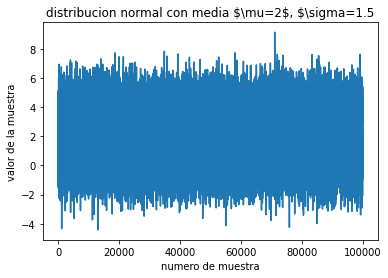

In [ ]:
# import modulos
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mu=2
sigma=1.5
N=100000

data = np.random.randn(N)*sigma + mu


# plot data
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("distribucion normal con media $\mu=2$, $\sigma=1.5")
plt.plot(data)
plt.show();



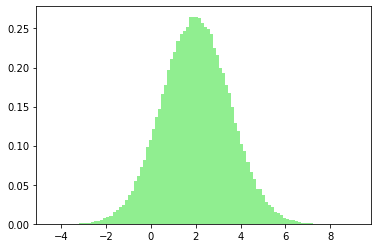

In [ ]:
# histograma
hx, hy, _ = plt.hist(data, bins=100, density=1, color='lightgreen')

Estimemos el log del likelihood function:

$$ LLF = -\sum_{i=1}^m \log p(x_i, \theta) $$

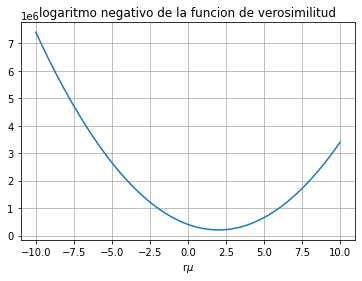

In [ ]:
# el espacio de thetas para la media, los llamo x, perdonen la confusion
theta = np.linspace(-10,10, 1000)


y = []
for i in theta:
    y.append(-np.log(scipy.stats.norm.pdf(data, i)).sum())
             
plt.plot(theta,y)

plt.title("logaritmo negativo de la funcion de verosimilitud")
plt.xlabel("r$\mu$")
plt.grid()
plt.show();

In [ ]:
# encontremos el minimo usando python (no calculo)
y_min = y.index(min(y))
print("media desde el -log(likelihood) ----> ", x[y_min])

media desde el -log(likelihood) ---->  2.0120120120120113


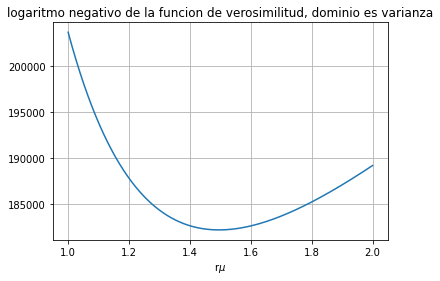

In [ ]:
# busquemos la varianza con MLE
x=np.linspace(1,2, 1000)
y=[]

for i in x:
    y.append(-np.log(scipy.stats.norm.pdf(data, 2.0120120120120113,  i)).sum())

plt.plot(x,y)


plt.title("logaritmo negativo de la funcion de verosimilitud, dominio es varianza")
plt.xlabel("r$\mu$")
plt.grid()
plt.show();   


In [ ]:
# encontremos el minimo usando python (no calculo)
y_min = y.index(min(y))
print("varianza desde el -log(likelihood) ----> ", x[y_min])

varianza desde el -log(likelihood) ---->  3.0


In [ ]:
# usemos sample estimation
m = len(data)
mean=sum(data)/m
std = np.sqrt( sum( (data-mu)**2)/(m-1))
print("media=%f y la desviacion estandard = %f directamente de las muestras"%(mean,std))


media=2.002187 y la desviacion estandard = 1.495443 directamente de las muestras


In [ ]:
# desde numpy
mean = np.mean(data)
std=np.std(data)
print("media=%f y la desviacion estandard = %f directamente de las muestras"%(mean,std))



media=2.002187 y la desviacion estandard = 1.495434 directamente de las muestras


Hay dos metodos conocidos para estimar parametros de series de tiempo usando likelihood

* Estimacion condicionada (conditional) de MLE
* Estimacion exacta de MLE (o incondicional)

## Estimacion condicional.
Pensemos en un modelo AR(1).

$$ X_t = \phi X_{t-1} + Z_t + c$$
Asumimos que los $Z_t$ son distribuciones (variables aleatorias) indepientes y identicamente distribuidas IID (normales con 
media $0$ y desviacion estandard $\sigma$. 

Los parametros para este modelo son: $\theta=(\phi, c, \sigma_Z^2)$. $\mu=0$

Definamos el "likelihood" para este proceso AR(1)

\begin{eqnarray}
P(X_1, X_2, \cdots , X_n; \theta) = \mathcal{L}(\theta | X) &=&
\frac{1}{(2 \pi \sigma^2)^{n/2}} \exp \left ( -\frac{1}{2 \sigma^2} \sum_{i=1}^n Z_i^2 \right ) \\
&=&\frac{1}{(2 \pi \sigma^2)^{n/2}} \exp \left ( -\frac{1}{2 \sigma^2} \sum_{i=1}^n (X_t - \phi X_{t-1} - c) ^2 \right )
\end{eqnarray}

El siguiente paso es hallar el LLF y lo llamamos funcion de costo $J(\theta)$

$$J(\theta) = \frac{n}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \sum_{t=1}^n ( X_t - \phi X_{t-1} + c)^2$$

Hacemos inversion simultanea. Recuerden el ejemplo en Python. Hallamos $\mu$ y con $\mu$ hallamos $\sigma^2$.

Necesitamos hallar el gradiente de $J$ e igularlo a 0.

$$\frac{\partial J}{\partial \sigma^2} = \frac{n}{2} \frac{1}{2 \pi \sigma^2} (2 \pi)  - \frac12 \frac{1}{\sigma^4}\sum_{t=1}^n ( X_t - \phi X_{t-1} + c)^2 = 0   $$

$$ n \sigma^2 - \sum_{t=1}^n ( X_t - \phi X_{t-1} + c)^2 = 0$$

$$\sigma^2 = \frac1n \sum_{t=1}^n (X_t - \phi X_{t-1} - c)^2 $$

No conocemos ni $c$ ni $\sigma^2$ estamos bloqueados. Toca seguir buscanco componentes del gradiente

$$ \frac{\partial J}{\partial \phi} = \frac{1}{\sigma^2} \sum_{t=1}^n (X_t - \phi X_{t-1} - c)X_{t-1} $$

Igualando a 0

$$ \phi \sum_{t=1}^n X_{t-1}^2 + c \sum_{t=1}^n X_{t-1} = \sum_{t=1}^n X_t X_{t-1}  
\quad , \quad (1) $$

La derivada parcial conrespecto a $c$

$$\frac{ \partial J}{\partial c} = \frac{1}{\sigma^2} \sum_{t=1}^n X_t - \phi X_{t-1} + c = 0 $$

$$ \phi \sum_{t=1}^n X_{t-1} + nc  = \sum_{t=1}^n X_t  \quad , \quad (2)$$

De las ecuaciones (1) y (2) sale un sistema de $2 \times 2$ que en forma matricial es:

\begin{eqnarray}
\begin{pmatrix}
\sum_{t=1}^n X_{t-1}^2  & \sum_{t=1}^n X_{t-1} \\
\sum_{t=1}^n X_{t-1} & n
\end{pmatrix}
\begin{pmatrix} \phi \\ c   \end{pmatrix}=
\begin{pmatrix} \sum_{t=1}^n X_t X_{t-1} \\
\sum_{t=1}^n X_t 
\end{pmatrix}
\end{eqnarray}






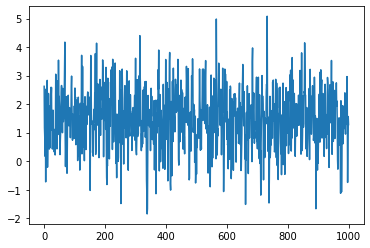

In [ ]:
# MLE (LLE) y AIC para un modelo AR(1)
# cargamos librerias
import matplotlib.pyplot as plt
import numpy as np


N=1000
np.random.seed(1)

Z = np.random.standard_normal(N)

phi=0.3
c=1

X=np.zeros(N)
X[0]=Z[0]+c


for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]+c

# no titulos no etiquetas
plt.plot(X)


Debemos resolve el sistema:
\begin{eqnarray}
\begin{pmatrix}
\sum_{t=1}^n X_{t-1}^2  & \sum_{t=1}^n X_{t-1} \\
\sum_{t=1}^n X_{t-1} & n
\end{pmatrix}
\begin{pmatrix} \phi \\ c   \end{pmatrix}=
\begin{pmatrix} \sum_{t=1}^n X_t X_{t-1} \\
\sum_{t=1}^n X_t 
\end{pmatrix}
\end{eqnarray}


In [ ]:
from re import S
S11 = sum(X**2) - X[N-1]**2
S12 = sum(X) - X[N-1]
S21 = S12
S22 = N   

sigma =1 # no recuerdo por que dije esto

Smat = np.array ([ [S11, S12], [S21, S22]])
b1 = sum( (X[t]*X[t-1] for t in range(1,N)))
b2 = sum (X[j] for j in range(1,N))
b = np.array([b1, b2])

theta = np.linalg.solve(Smat,b)
phimle = theta[0]
cmle = theta[1]
print(theta)


# varianza
s2 = (1/N) * sum (  (X[t] - phi*X[t-1] + c)**2 for t in range(1, N))
print(s2)




[0.27699927 1.07027947]
5.105989544421032


Ahora llamos el Log likelihood

$$J(\theta) = - \log \mathcal{L}(\theta, X) = \frac{n}{2} \log (2 \pi \sigma^2)  + \frac{1}{2 \sigma^2} \sum_{t=1}^n (X_t - \phi X_{t-1} - c)^2 $$


In [ ]:
ll = -(N/2)*np.log(2 * np.pi*s2) - (1/(2*s2))*sum( ( X[t] - phi*X[t-1] - c)**2 for t in range(1,N))
ll

-1828.2740461181345

In [ ]:
import statsmodels.api as sm   
endog=X
mod = sm.tsa.SARIMAX(endog, order=(2,0,0))
res = mod.fit()
summary = res.summary()
summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1518.866
Date:                Thu, 26 May 2022   AIC                           3043.733
Time:                        15:31:02   BIC                           3058.456
Sample:                             0   HQIC                          3049.328
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5454      0.031     17.672      0.000       0.485       0.606
ar.L2          0.2896      0.029      9.898      0.000       0.232       0.347
sigma2         1.2200      0.055     22.184      0.000       1.112       1.328
===================================================================================
Ljung-Box (Q):                      116.43   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.00   Prob(JB):                         0.53
Heteroskedasticity (H):               0.99   Skew:                            -0.08
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
type(summary)

statsmodels.iolib.summary.Summary

In [ ]:
# convertir en dataframe de pandas
import pandas as pd
from io import StringIO
results_as_html = summary.as_html()
df = pd.read_html( results_as_html, header=0, index_col=0)[0]
df


,y,No. Observations:,1000
Dep. Variable:,,,
Model:,"SARIMAX(2, 0, 0)",Log Likelihood,-1518.866
Date:,"Thu, 26 May 2022",AIC,3043.733
Time:,15:31:02,BIC,3058.456
Sample:,0,HQIC,3049.328
NaN,- 1000,NaN,NaN
Covariance Type:,opg,NaN,NaN


In [ ]:
dfalign = df.to_numpy()

In [ ]:
dfalign

array([['SARIMAX(2, 0, 0)', 'Log Likelihood', -1518.866],
       ['Thu, 26 May 2022', 'AIC', 3043.733],
       ['15:31:02', 'BIC', 3058.456],
       ['0', 'HQIC', 3049.328],
       ['- 1000', nan, nan],
       ['opg', nan, nan]], dtype=object)

In [ ]:
loglikesn = dfalign[0][2]
loglikesn

-1518.866

In [ ]:
# error entre mi calculo y el stasmodels
# relativo

relativeerror = (ll - loglikesn)/ll
relativeerror   # muy grande comparado con las notas de clase. Por que?  no se

0.16923504809089326

Calculo del AIC:

$$ \text{AIC} = 2K - 2 \log (L)$$

In [ ]:
K=2 # la constante y phi
AIC = 2*K - 2*ll   
AIC  # hay error con respecto a statsmodels

3660.548092236269

In [ ]:
# statsmodels
AICsm = sm.tools.eval_measures.aic(ll, N, 2)
print("AIC from statsmodels", AICsm)
absolute_error=(AIC - AICsm)
print("absolute error from formula and stasmodels", absolute_error)

AIC from statsmodels 3660.548092236269
absolute error from formula and stasmodels 0.0
